In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=3,random_state=42)

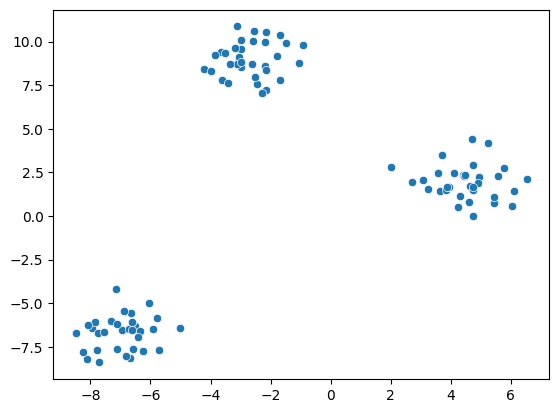

In [2]:
sns.scatterplot(x=X[:,0],y=X[:,1])
plt.show()

# Scikit Implementation

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


## Cluster Centers

In [4]:
model.cluster_centers_

array([[-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013]])

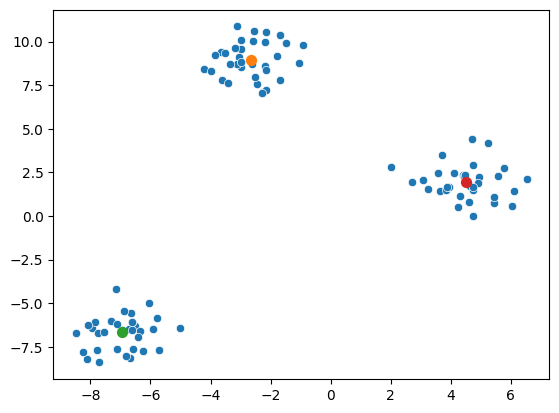

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1])

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=50)

plt.show()

# My KMeans

In [6]:
import numpy as np

class MyKMeans:
    def __init__(self, n_clusters, max_iter=100, tol=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def _assign_points(self, X):
        distances = np.linalg.norm(
            X[:, np.newaxis, :] - self.cluster_centers_[np.newaxis, :, :], axis=2
        ) # [samples, clusters]
        self.labels_ = np.argmin(distances, axis=1) # [samples]


    def _update_centroids(self, X):
        updated_centers = np.zeros_like(self.cluster_centers_)

        for i in range(self.n_clusters):
            mask = self.labels_ == i
            if np.any(mask):
                updated_centers[i] = np.mean(X[mask], axis=0)
            else:
                # Reinitialize empty cluster
                updated_centers[i] = X[np.random.randint(0, X.shape[0])]

        return updated_centers

    def fit(self, X: np.ndarray,):
        cluster_centers_indices = np.random.choice(X.shape[0], self.n_clusters) # [n_clusters]
        self.cluster_centers_ = X[cluster_centers_indices, :] # [n_clusters, features]
        for i in range(self.max_iter):
            self._assign_points(X)
            temp = self._update_centroids(X)
            if (np.linalg.norm(temp - self.cluster_centers_) < self.tol):
                break

            self.cluster_centers_ = temp

        return self
    
    def predict(self, X):
        distances = np.linalg.norm(
            X[:, np.newaxis, :] - self.cluster_centers_[np.newaxis, :, :],
            axis=2
        )
        return np.argmin(distances, axis=1)

In [7]:
model = MyKMeans(n_clusters=3)
model.fit(X)

In [8]:
model.cluster_centers_


array([[-2.66780392,  8.93576069],
       [ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669]])

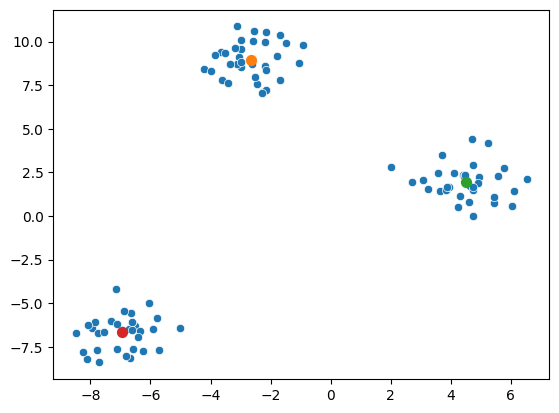

In [9]:
sns.scatterplot(x=X[:,0],y=X[:,1])

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=50)

plt.show()